In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [2]:
#Load dataset
df = pd.read_csv("creditcard.csv")
print("Dataset shape:", df.shape)


Dataset shape: (284807, 31)


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = df.drop("Class", axis=1).values  #these are just the input features used by the model,.values converts the DataFrame into a NumPy array
y = df["Class"].values   # 0 = Normal, 1 = Fraud , y tells us whether a transaction is normal (0) or fraudulent (1).

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [8]:
X_train = X_train[y_train == 0]

In [9]:
input_dim = X_train.shape[1] # number of features
encoding_dim = 14 

In [10]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(28, activation="relu")(input_layer)
encoded = Dense(encoding_dim, activation="relu")(encoded)

In [11]:
decoded = Dense(28, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded) #Activation: sigmoid (since data is scaled between 0–1).


In [12]:
autoencoder = Model(input_layer, decoded)

In [13]:
# 4. Compile model, Optimizer = Adam (gradient descent optimization)
autoencoder.compile(optimizer=Adam(learning_rate=0.001),
                    loss="mse",
                    metrics=["mae"])

In [14]:
# Train model
# Input = X_train, Output = X_train (because we want to reconstruct input)
# Batch size = 64 → updates weights every 64 samples.
# Validation split = 0.2 → keeps 20% data for validation
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8658 - mae: 0.6095 - val_loss: 0.7281 - val_mae: 0.5182
Epoch 2/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.7049 - mae: 0.5124 - val_loss: 0.7148 - val_mae: 0.5051
Epoch 3/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7192 - mae: 0.5038 - val_loss: 0.7105 - val_mae: 0.5012
Epoch 4/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7246 - mae: 0.4986 - val_loss: 0.7054 - val_mae: 0.4969
Epoch 5/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6995 - mae: 0.4944 - val_loss: 0.7033 - val_mae: 0.4946
Epoch 6/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7148 - mae: 0.4926 - val_loss: 0.7009 - val_mae: 0.4926
Epoch 7/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6956 - mae: 0.4902 - val_loss: 0.6992 - val_mae: 0.4905
Epoch 8/20
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7102 - mae: 0.4885 - val_loss: 0.6982 - val_mae: 0.4892
Epoch 9/20
2488/2488 ━━━━━━━━━━━━━━━━━━

In [15]:
# Reconstruction error
# Predict reconstructed outputs for test data
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step


In [16]:
threshold = np.percentile(mse, 95)
print("Reconstruction error threshold:", threshold)

Reconstruction error threshold: 1.4364859064350948


In [24]:
y_pred = (mse > threshold).astype(int)

fraud_count = np.sum(y_pred)
print("Number of predicted fraud transactions:", fraud_count)


Number of predicted fraud transactions: 4273


In [18]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[81158  4149]
 [   12   124]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     85307
           1       0.03      0.91      0.06       136

    accuracy                           0.95     85443
   macro avg       0.51      0.93      0.52     85443
weighted avg       1.00      0.95      0.97     85443



In [19]:
#It measures how well the model separates the two classes (Normal vs Fraud).
print("ROC AUC Score:", roc_auc_score(y_test, mse))

ROC AUC Score: 0.9613108433967558


In [22]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")


Final Training Loss: 0.6911217570304871
Final Validation Loss: 0.6898631453514099


In [20]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28)                  │             868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 28)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │             870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,694 (30.06 KB)

 Trainable params: 2,564 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,130 (20.04 KB)

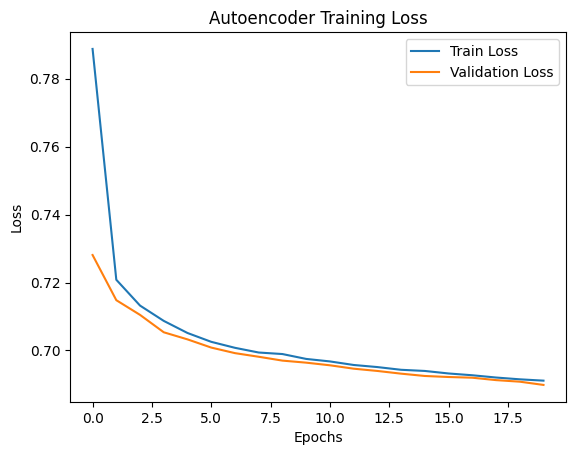

In [21]:
#Plot Training and Validation Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()